## NLP on User Bio
Doing so will help us understand the users' biodata and determine which words are important


In [23]:
# Importing the libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk import FreqDist
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Loading the data
with open("/user_data.pkl",'rb') as fp:
    df = pickle.load(fp)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Tokenising and Lemmatising
Breaking sentences into individual tokens and converting those to their base form

In [24]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenizing Function
def tokenize(text):

# Tokenizing the bios, then lemmatizing them
   
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    
# Applying the function to each user bio
df['Bios'] = df.Bios.apply(tokenize)

## Most Frequently Occurring Words

Number of unique words:  104


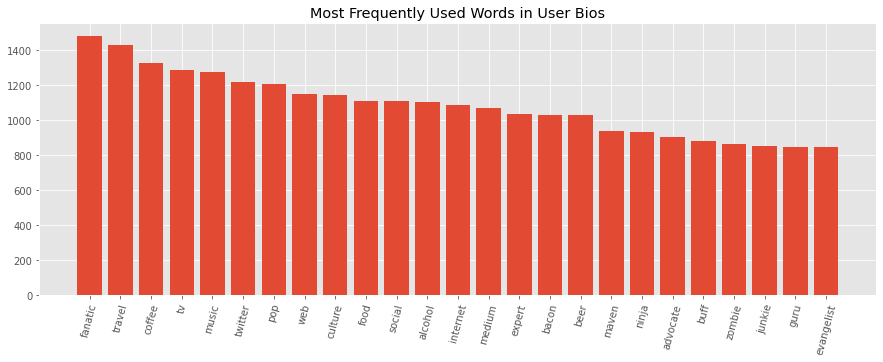

In [25]:
# Creating a set list that will only take in unique words
total_vocab = set()

# Iterating through the bios for each word
for bio in df['Bios']:
    total_vocab.update(bio)

# Printing out the number of unique words in all the bios combined
print("Number of unique words: ",len(total_vocab))

# Determining the most frequent words in user bios
words = []

# Adding all the words in each bio to a list
for bio in df['Bios']:
    words.extend(bio)

# Determining the use frequency of each word in all the bios
bio_freq = FreqDist(words)
bio_freq.most_common(104)

# Plotting the most frequently used words
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

### Word Bigrams


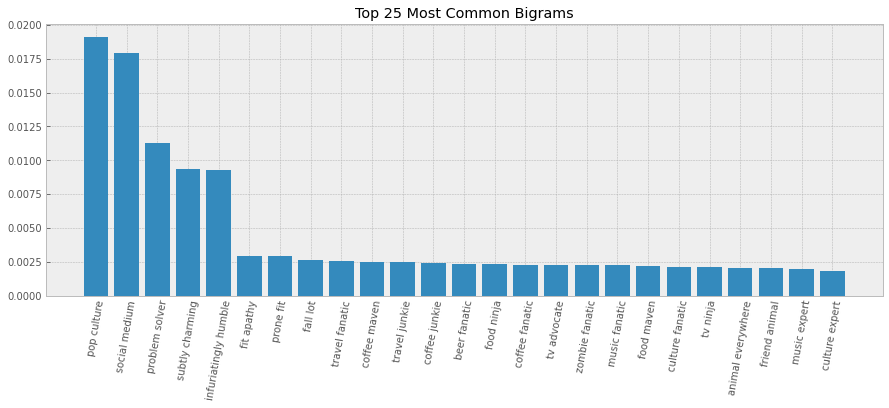

In [26]:
# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

# Top 50 most common bigrams
bio_scored[:50]

# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()